In [1]:
import os

In [2]:
fname = os.path.join('jena_climate_2009_2016.csv')

In [3]:
pwd

'C:\\Users\\reeshabh.choudhary\\OneDrive - xpdnp\\Coding\\ML\\Books\\Deep Learning with Python 2nd edition-François Chollet(2021)\\mine\\Chapter 10'

In [4]:
with open(fname) as f:
    data = f.read()

In [5]:
lines = data.split('\n')

In [13]:
lines[0]

'01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30'

In [6]:
header = lines[0].split(',')

In [7]:
lines = lines[1:]

In [8]:
print(header)

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']


In [9]:
print(len(lines))

420451


In [10]:
lines[0]

'01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30'

# Parsing the data

In [14]:
import numpy as np

In [15]:
temperature = np.zeros((len(lines), ))

In [16]:
raw_data = np.zeros((len(lines), len(header) - 1))

In [19]:
print(header)

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']


In [20]:
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]] # not taking into account "Date Time" column
    temperature[i] = values[1] # we store column 1 in the temperature array
    raw_data[i, :] = values[:] # we store all columns including temperature in the "raw_data" array

# Plotting the temperature timeseries

In [21]:
from matplotlib import pyplot as plt

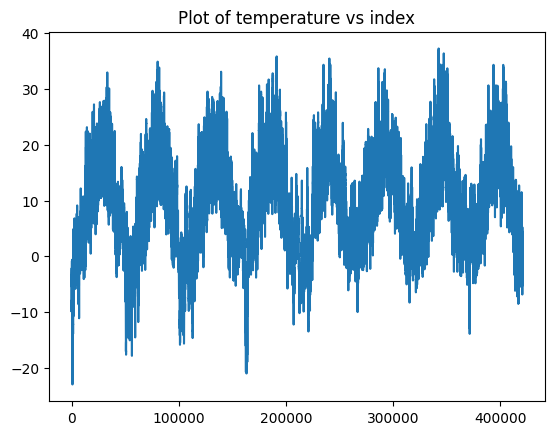

In [32]:
plt.plot(range(len(temperature)), temperature); plt.title("Plot of temperature vs index");

In [34]:
print(temperature.max()); print(temperature.min())

37.28
-23.01


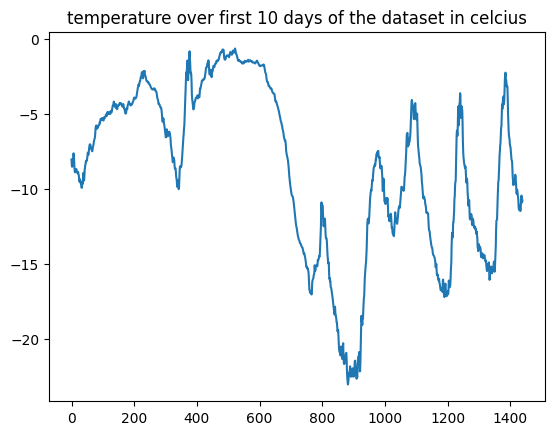

In [37]:
# plotting the first 10 days of the temperature timeseries
plt.plot(range(1440), temperature[:1440]);plt.title("temperature over first 10 days of the dataset in celcius");

In [38]:
num_train_samples = int(0.5 * len(raw_data))

In [39]:
num_val_samples = int(0.25 * len(raw_data))

In [40]:
num_test_samples = len(raw_data) - num_train_samples - num_val_samples

In [41]:
print(num_train_samples); print(num_val_samples);print(num_test_samples);

210225
105112
105114


In [45]:
raw_data[0]

array([  7.77070534, -16.84590329, -17.5050718 , -13.21331863,
        17.42724524,  -9.81569946,  -6.08414209,  -3.73148184,
        -3.87050741,  -6.18208943,  89.29795985,  -1.11977462,
        -1.81048029, -24.1405232 ])

In [42]:
mean = raw_data[:num_train_samples].mean(axis=0)

In [44]:
mean

array([ 988.74929466,    8.82590329,  282.9050718 ,    4.31331863,
         75.87275476,   13.14569946,    9.19414209,    3.95148184,
          5.81050741,    9.30208943, 1218.45204015,    2.14977462,
          3.56048029,  176.4405232 ])

In [43]:
raw_data -= mean